# Data Science In Python- Assignment 1

  ##  Name- Shri Krishna Didwania
  
  ## Student Number -  18203023
  
  

Below are all the import statements required for fetching all the necessary libraries to run the notebook

In [ ]:
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import requests
import os
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline


# Task1
1. Data Identification and Collection:

<ul>
     <li>I have chosen the <b> Zomato api</b> for fetching data</li>
     <li>It is limited to <b>1000 calls</b> per day</li>
     <li>I have collected of over 200 restaurants in Belfast using the api</li>
     <li> City id for belfast is 320 which is used when I fetch the data for the restaurants </li>
     <li> The api key is <b> 5b459dc1de0da96b10c186fb9c2b2b8a </b></li>
    </ul>


In [2]:
api_key = "5b459dc1de0da96b10c186fb9c2b2b8a"
count_api = 0

# Data Collection
<li> Cuisine data (cuisine id and cuisine name) is fetched into a json file named <b>cuisines_information.json </b></li>

In [5]:
if count_api < 1001:
    cuisines = requests.get('https://developers.zomato.com/api/v2.1/cuisines?city_id=320',
                                headers={'Accept':'application/json','user-key':'5b459dc1de0da96b10c186fb9c2b2b8a'})
    count_api=count_api+1
else:
    print("Number of Api requests exceeded")    #api limit exceeded

try:
    file_name='cuisines_information.json'#the file where the data is stored
    file = open(file_name, "w")
    file.write(cuisines.text)
    file.close()
except Exception as t:
    print("Can't write to the  file \n :"+ str(t))
#some references taken from https://www.youtube.com/watch?v=ChwSD5e0Qs0


Converting the json data into a dataframe set named <b>"cuisines_dataset"</b>

In [247]:
with open('cuisines_information.json') as cuisines_json:
    cuisines = json.load(cuisines_json)
    cuisines = cuisines['cuisines']
    cuisines_list = []
    for cuisine in cuisines:
        cuisines_list.append([cuisine['cuisine']['cuisine_id'],cuisine['cuisine']['cuisine_name']])
        
cuisines_dataset = pd.DataFrame(cuisines_list)
cuisines_dataset.columns = ['cuisine_id','cuisine_name']

Converted the dataframe to a csv file <b> cuisines_dataset.csv</b>

In [250]:
cuisines_dataset.to_csv('cuisines_dataset.csv', header=True, index=None) #exporting to csv

Reading all the json files with the restaurants information from the api
<br>
Refereed the code on github mentioned in the end

In [39]:
for cuisine_id in cuisines_dataset['cuisine_id']:
    count =0
    start=0
    while count < 3:
        if count_api > 1000:
            link='https://developers.zomato.com/api/v2.1/search?start=%d&count=20&lat=54.607868&lon=-5.926437&cuisines=%d' % (start,cuisine_id)
            restro_results=requests.get(link,headers={'Accept':'application/json','user-key':'5b459dc1de0da96b10c186fb9c2b2b8a'})
            count_api = count_api + 1 
            restro_json=restro_results.json()
            results = restro_json['results_shown']            
            if(results == 0):
                break;
            else:
                #file collection (json files) from the server
                try:
                    file_name='%d_%d.json'% (cuisine_id,count)
                    file_name=os.path.join(os.getcwd(),'restaurants',file_name)
                    file = open(file_name, "w")
                    file.write(restro_results.text)
                    file.close()
                    start = start+20
                    count += 1
                except Exception as m:
                    print("Cannot write to file"+str(m))      
        else:
            print("The number of api requests exceeded")  
            break; #resetting the api count
           
    if(count_api < 1000):
        print("The number of api requests exceeded")  
        break 


SyntaxError: invalid syntax (<ipython-input-39-a53e2a4d4550>, line 10)

Reading all the json files collected above in the restaurants folder and writing it in a dataset to work upon
Referred the code on github mentioned in the end and geeksforgeeks

In [41]:
path_to_json = './restaurants/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
restaurants_list =[]

for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        restro = json.load(json_file)
        restaurants = restro['restaurants']
    
        for restaurant in restaurants:
            restaurants_list.append([restaurant['restaurant']['id'],restaurant['restaurant']['name'],restaurant['restaurant']['url'],
                                restaurant['restaurant']['location']['address'],restaurant['restaurant']['location']['locality'],
                                restaurant['restaurant']['location']['city'],restaurant['restaurant']['location']['city_id'],
                                restaurant['restaurant']['location']['latitude'],restaurant['restaurant']['location']['longitude'],     
                                restaurant['restaurant']['location']['zipcode'],restaurant['restaurant']['location']['country_id'],
                                restaurant['restaurant']['location']['locality_verbose'],restaurant['restaurant']['cuisines'],
                                restaurant['restaurant']['average_cost_for_two'],restaurant['restaurant']['user_rating']['aggregate_rating'],
                                restaurant['restaurant']['user_rating']['rating_text'],restaurant['restaurant']['user_rating']['votes'],
                                restaurant['restaurant']['has_online_delivery'],restaurant['restaurant']['is_table_reservation_supported'],
                                restaurant['restaurant']['establishment_types']])


restaurants_dataset = pd.DataFrame(restaurants_list)
restaurants_dataset.columns = ['restaurant_id','restaurant_name','url','address','locality','city','city_id','latitude','longitude','zipcode',
                               'country_id','locality_verbose','cuisines','average_cost_for_two','aggregate_rating','rating_text',
                               'votes','has_online_delivery','is_table_reservation_supported','establishment_types']

In [298]:
restaurants_dataset.head()

,restaurant_id,restaurant_name,url,address,locality,city,city_id,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,has_online_delivery,is_table_reservation_supported,establishment_types
0,16675405,Uluru Bar & Grill,https://www.zomato.com/belfast-northern-irelan...,"3-5 Market Street, Armagh, Belfast BT61 7BW",Armagh,Belfast,320,54.2485423000,-6.7052175000,BelfastBT61 7BW,215,"Armagh, Belfast","Steak, Australian, Grill",50,0,Not rated,1,0,0,[]
1,16674551,Barking Dog,https://www.zomato.com/belfast-northern-irelan...,"33-35 Malone Rd, Belfast BT9 6RU",Belfast,Belfast,320,54.5808528000,-5.9385134000,BelfastBT9 6RU,215,"Belfast, Belfast",British,12,3.4,Average,9,0,0,[]
2,16674933,James Street South,https://www.zomato.com/belfast-northern-irelan...,"21 James St South, Belfast BT2 7GA",Belfast,Belfast,320,54.5954480000,-5.9328050000,BelfastBT2 7GA,215,"Belfast, Belfast","Bar Food, Scottish, British",12,3.9,Good,12,0,0,[]
3,16675079,Mollys Yard,https://www.zomato.com/belfast-northern-irelan...,"Botanic Ave, Belfast BT7 1JR",Belfast,Belfast,320,54.5861817000,-5.9322265000,BelfastBT7 1JR,215,"Belfast, Belfast",British,0,3.7,Good,4,0,0,[]
4,16675293,Shu,https://www.zomato.com/belfast-northern-irelan...,"253 Lisburn Rd, Belfast BT9 7EN",Belfast,Belfast,320,54.5813100000,-5.9482210000,BelfastBT9 7EN,215,"Belfast, Belfast","French, British",0,3.4,Average,4,0,0,[]


# Data Preprocessing

In [299]:
len(restaurants_dataset)

230

Exporting the dataset to a csv file

In [ ]:
export_csv = restaurants_dataset.to_csv (r'restaurants_dataset.csv', index = None, header=True)


prints the length of cuisine dataset

In [303]:
cuisines_dataset.head()
len(cuisines_dataset)#prints the length

59

checks if the restaurant is unique

In [305]:
restaurants_dataset['restaurant_id'].nunique()


230

drops the dupicate rows in the restaurant dataset and prints its length

In [ ]:
restaurants_dataset.drop_duplicates(subset ="restaurant_id", keep = 'first', inplace = True)
len(restaurants_dataset)

checks if all the zipcodes are unique

In [57]:
restaurants_dataset['zipcode'].unique()


array(['BT61 7BW', 'BT9 6RU', 'BT2 7GA', 'BT7 1JR', 'BT9 7EN', 'BT23 5NE',
       'BT9 6BQ', 'BT36 5QE', 'BT53 6AL', 'BT9 6AH', 'BT1 6PF',
       'BT54 6DP', 'BT1 3EA', 'BT41 4LL', 'BT1 2AA', 'BT2 7BA',
       'BT23 4LH', 'BT40 3DX', 'BT7 2FZ', 'BT23', 'BT74', 'BT1 3JL', '',
       'BT15 5GE', 'BT49 0LP', 'BT74 6AA', 'BT44', 'BT38 7FG', 'BT12 4GX',
       'BT7 1RS', 'BT23 4AB', 'BT57 8QE', 'BT4 2AN', 'BT19 1JH',
       'BT71 5AX', 'BT20 4AG', 'BT74 7EH', 'BT51', 'BT18', 'BT9 7GU',
       'BT7 1RQ', 'BT4 3JF', 'BT6 8', 'BT70 1HN', 'BT1 1', 'BT9 6RT',
       'BT12 6AH', 'BT62', 'BT1', 'BT2 7FF', 'BT1 4QN', 'BT52 1DE',
       'BT71', 'BT48 6JZ', 'BT51 3NA', 'BT2 8HS', 'BT9 7GT', 'BT16 1XT',
       'BT20 3BB', 'BT80', 'BT9 7GX', 'BT30', 'BT20 4JP', 'BT43', 'BT48',
       'BT7 3GP', 'BT36 7QT', 'BT32 3DF', 'BT60', 'BT16', 'BT66',
       'BT52 1TP', 'BT45', 'BT53 6QN', 'BT12', 'BT3 9DT', 'BT48 7PU',
       'BT5 5DL', 'BT28 1LP', 'BT80 8QB', 'BT37 9UH', 'BT48 7BN',
       'BT48 7BW', 'BT1 5BB

Adds Belfast to the zipcodes for proper understanding and writes that in the file

In [306]:
restaurants_dataset["zipcode"].replace('', 'Not Available', inplace=True)
new_zipcode = []
for item in restaurants_dataset['zipcode']:
    item[0:7].replace("Belfast"," ")
        
    new_zipcode.append(item)#appends Belfast to the zipcode

 
restaurants_dataset['zipcode'] = new_zipcode
restaurants_dataset['zipcode'].unique()#prints the uique zipcodes



array(['BelfastBT61 7BW', 'BelfastBT9 6RU', 'BelfastBT2 7GA',
       'BelfastBT7 1JR', 'BelfastBT9 7EN', 'BelfastBT23 5NE',
       'BelfastBT9 6BQ', 'BelfastBT36 5QE', 'BelfastBT53 6AL',
       'BelfastBT9 6AH', 'BelfastBT1 6PF', 'BelfastBT54 6DP',
       'BelfastBT1 3EA', 'BelfastBT41 4LL', 'BelfastBT1 2AA',
       'BelfastBT2 7BA', 'BelfastBT23 4LH', 'BelfastBT40 3DX',
       'BelfastBT7 2FZ', 'BelfastBT23', 'BelfastBT74', 'BelfastBT1 3JL',
       'BelfastNot Available', 'BelfastBT15 5GE', 'BelfastBT49 0LP',
       'BelfastBT74 6AA', 'BelfastBT44', 'BelfastBT38 7FG',
       'BelfastBT12 4GX', 'BelfastBT7 1RS', 'BelfastBT23 4AB',
       'BelfastBT57 8QE', 'BelfastBT4 2AN', 'BelfastBT19 1JH',
       'BelfastBT71 5AX', 'BelfastBT20 4AG', 'BelfastBT74 7EH',
       'BelfastBT51', 'BelfastBT18', 'BelfastBT9 7GU', 'BelfastBT7 1RQ',
       'BelfastBT4 3JF', 'BelfastBT6 8', 'BelfastBT70 1HN',
       'BelfastBT1 1', 'BelfastBT9 6RT', 'BelfastBT12 6AH', 'BelfastBT62',
       'BelfastBT1', 'Belf

referred geeksforgeeks and github for the code
splits the cuisines and treats restaurant_id and cuisine value as the primary key

In [308]:
df_split_cuisines = pd.DataFrame(restaurants_dataset.cuisines.str.split(',').tolist(), \
                                           index=restaurants_dataset.restaurant_id).stack()
df_split_cuisines = df_split_cuisines.reset_index([0, 'restaurant_id'])
df_split_cuisines.columns = ['restaurant_id', 'new_cuisines_value']
df_split_cuisines.head()

,restaurant_id,new_cuisines_value
0,16675405,Steak
1,16675405,Australian
2,16675405,Grill
3,16674551,British
4,16674933,Bar Food


referred geeksforgeeks and github for the code
groups the columns according to their rating text and their count

In [96]:
rating_dataset = restaurants_dataset.groupby('rating_text')['restaurant_id'].count().reset_index(name ='Total Number of Restaurants')
rating_dataset#prints the rating dataset

,rating_text,Total Number of Restaurants
0,Average,6
1,Good,8
2,Not rated,216


# Data Visualisation

Matplotlib is used to plot the pie chart. Referred geeksforgeeks for some details for the procedure

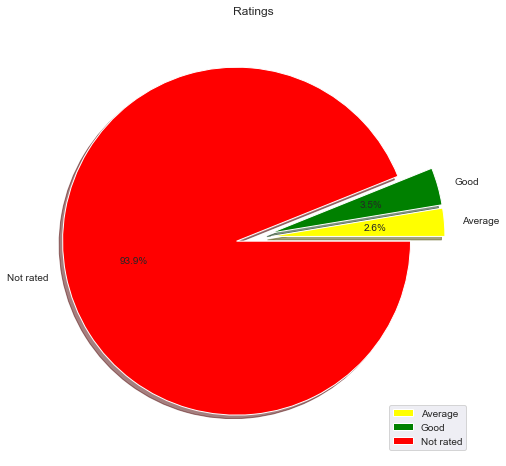

In [279]:
#refernce taken from https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
labels = rating_dataset['rating_text']#creates the labels
sizes = rating_dataset['Total Number of Restaurants']
explode = (0.1, 0.1, 0.1) 
colors = ['yellow', 'green', 'red']#colors to represent
fig1 ,ax1 = plt.subplots(figsize=(8,8))#size of the figure (pie chart)
ax1.pie(sizes, explode=explode, colors=colors,labels=labels, autopct='%1.1f%%',shadow=True)
plt.title('Ratings') 
plt.legend(labels,loc=4)
plt.show()#prints the graph

Data is extracted and put in a dataframe
<br>
Referred to the github code mentioned in the end


In [283]:
#referred to the github code mentioned in the end
series=restaurants_dataset["restaurant_name"].value_counts().head(10)
popular_restaurants = pd.DataFrame(series).reset_index()
popular_restaurants.columns = ['Restaurant Name', 'Number of Restaurants']
popular_restaurants



,Restaurant Name,Number of Restaurants
0,McDonald's,17
1,Burger King,5
2,Dormans Bar,2
3,Mourne Seafood Bar,2
4,Eds Bar and Grill,2
5,Guapo Fresh Mexican,1
6,Wooden Boat,1
7,Slice of America,1
8,Lurgan Oriental,1
9,Bombay Brasserie - Belfast,1


Bar chart is used to plot the maximum number of restaurants(McDonalds) in this case.

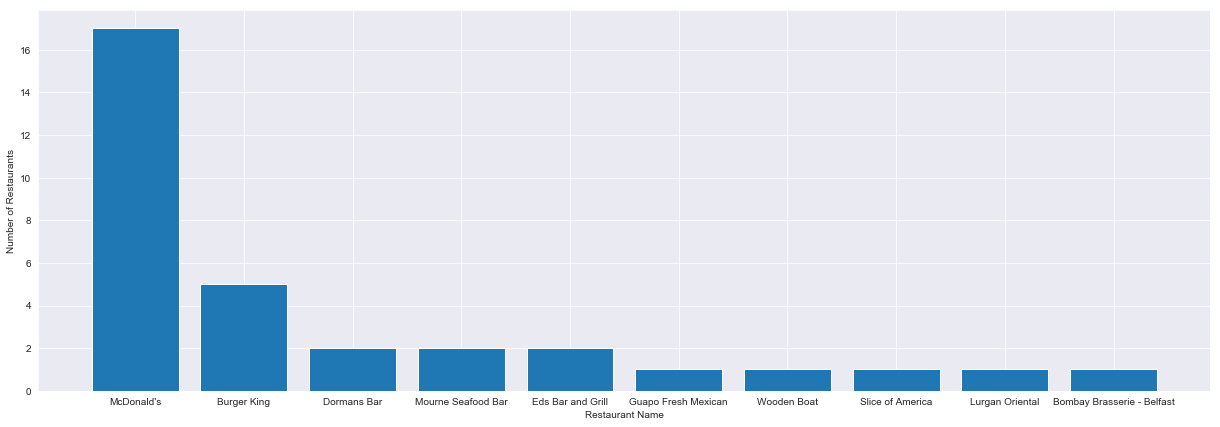

In [290]:
fig = plt.figure(figsize = (21, 7)) #size of the graph figure
plt.bar(popular_restaurants['Restaurant Name'],popular_restaurants['Number of Restaurants'])
plt.xlabel('Restaurant Name')#x axis label
plt.ylabel('Number of Restaurants')#y axis label
plt.show()#prints the graph

In [309]:
series=df_split_cuisines['new_cuisines_value'].value_counts().head(3)
popular_cuisines_df = pd.DataFrame(series).reset_index()
popular_cuisines_df.columns = ['Cuisine Name', 'Number of Restaurants']
popular_cuisines_df

,Cuisine Name,Number of Restaurants
0,Bar Food,53
1,American,51
2,Asian,42


referred to the github code mentioned in the end
Pie chart using matplotlib to plot the most popular cuisines

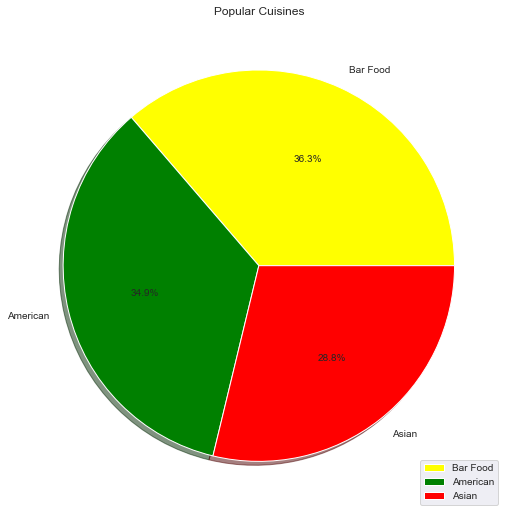

In [312]:

labels = popular_cuisines_df['Cuisine Name']
sizes = popular_cuisines_df['Number of Restaurants']
explode = (0, 0, 0) 
colors = ['yellow', 'green', 'red']#color to show the pie chart divisions
fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.pie(sizes, explode=explode, colors=colors,labels=labels, autopct='%1.1f%%',shadow=True)
plt.title('Popular Cuisines')
plt.legend(labels,loc=4)
plt.show()#prints the pie chart

In [313]:
p = restaurants_dataset[['restaurant_name', 'average_cost_for_two']]
sort_by_cost =p.sort_values('average_cost_for_two',ascending=False)#sorting in ascending order
sort_by_cost=sort_by_cost.head(3)#printing the top 3 expensive restaurants
sort_by_cost

,restaurant_name,average_cost_for_two
101,Raincheck,60
0,Uluru Bar & Grill,50
108,Seasons - The Balmoral Hotel,50


referred to the geeksforgeeks  mentioned in the end
Pie chart using matplotlib to plot the most expensive restaurants

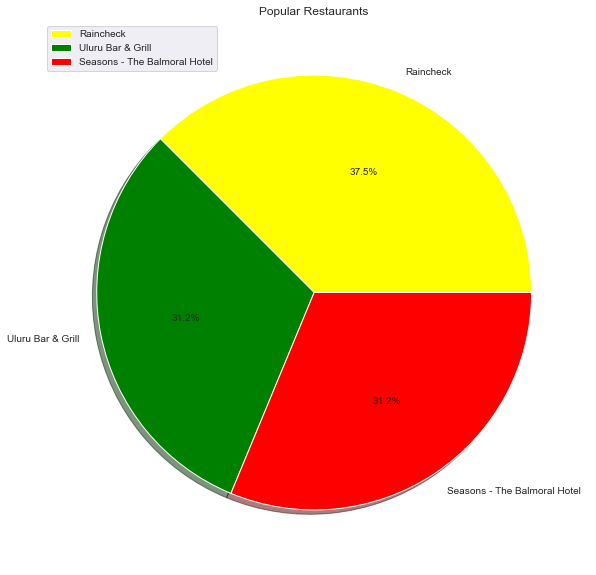

In [316]:
labels = sort_by_cost['restaurant_name']
sizes = sort_by_cost['average_cost_for_two']
explode = (0, 0, 0) 
colors = ['yellow', 'green', 'red']#color to show the pie chart divisions

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, colors=colors,labels=labels, autopct='%1.1f%%',shadow=True)
plt.title('Popular Restaurants')
plt.legend(labels,loc=2)
plt.show()#prints the pie plot

used the code from above to do the same ting with locality and number of restaurants

In [265]:
restaurants_count_by_locality= restaurants_dataset['locality'].value_counts().head(5)
restaurants_count_by_locality_df = pd.DataFrame(restaurants_count_by_locality).reset_index()
restaurants_count_by_locality_df.columns = ['Locality', 'Number of Restaurants']
restaurants_count_by_locality_df

,Locality,Number of Restaurants
0,Belfast,99
1,Ards,11
2,Dungannon and South Tyrone,10
3,Derry,10
4,Down,9


Matplotlib is used for creating a bar graph to plot the locality with maximum number of restaurants
<br>


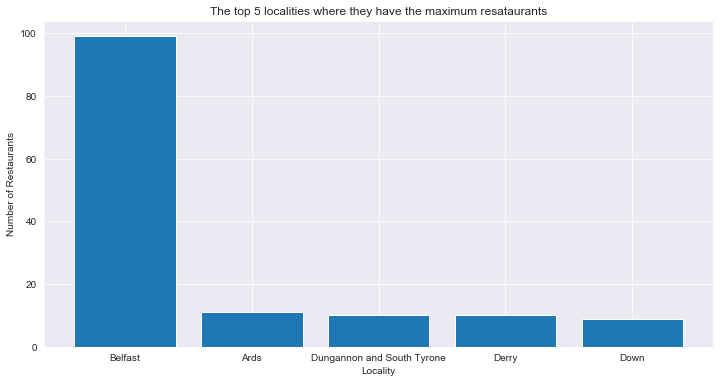

In [270]:
fig = plt.figure(figsize = (12, 6)) #size of the graph figure
plt.bar(restaurants_count_by_locality_df['Locality'],restaurants_count_by_locality_df['Number of Restaurants'])
plt.title('The top 5 localities where they have the maximum resataurants')#title of the graph
plt.xlabel('Locality')#x axis label
plt.ylabel('Number of Restaurants')#y axis label
plt.show()#prints the graph

Seaborn is used for visualization for this part of the data with votes , rating and and average cost of the restaurant for 2 people

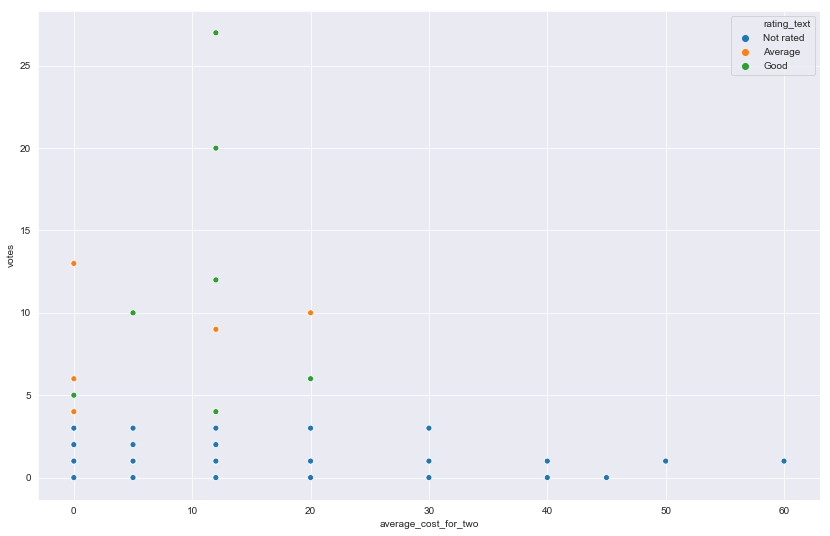

In [258]:
#using seaborn to plot a scatter plot to visualize data
sns.set_style("darkgrid")
plt.figure(figsize=(14,9))
ax = sns.scatterplot(y="votes", x="average_cost_for_two",hue="rating_text", data=restaurants_dataset)
plt.show()#prints the plot on the screen below

# Analysis and Summarization of the results
<br>

<li> <b>3</b> pie chart,<b> 2</b> bar chart and <b>1</b> scatter plot is used to plot the available data</li>
<li> According to the first pie chart, majority of the people <b>dont rate</b> the restaurants. We should raise awareness among the customers to rate the restaurants to get a proper picture about it</li>
<li>According to the 2nd bar chart,<b> mcdonalds</b> has the most number of restaurants in belfast followed by <b>Burger King</b>(according to the data we have)
<li>According the 3rd pie chart,<b> Bar food </b>is available in most restaurants, followed by<b> american</b> and <b>asian</b> <li>According to the 4th pie chart, the 3 most expensiive restaurants are<b> Raincheck(avg cost =60 )</b>,<b>Uluru Bar & Grill(avg cost=50)</b> and <b>Seasons - The Balmoral Hotel(avg cost=50)</b></li>
<li>According to the 5th bar chart, area around<b> Belfast</b> has the most restaurants followed by <b>Ards</b> and other places </li>
<li> According the 6th Scatter plot, the restaurant with rating as <b>good</b> fall in the region with 10 votes or above

# Future improvisations
<br>
<li> I have fetched data of around <b>236</b> restaurants to analyse. In future a lot more data could be fetched for better ideas and visualizations </li>
<li> I have taken cuisine data and information for fetching restuarant data. In future, we could use the data from establishments and categories to fetch data</li>
<li> <b>Web scraping</b> using <b>Beautiful Soup</b> could be done to fetch more data about different restaurants and merge it with the data we already have for proper analysis</li>
<li> <b>Sentiment analysis</b> libraries could be used to analyse the <b> reviews</b> written by the customers and to get a better picture of the restaurants </li>
<li> I feel that the project can be improved by fetching a <b>larger chunk</b> of data but i was facing a issue with the <b>limitation of API calls(1000/day)</b> as it was getting exhausted in <b>5 minutes</b> which is why i had to take a smaller chunk of data</li>




# Sources and Citations
   <br>
<li> <b> Lectures and notes </b>available on brightspace </li>
<li> data science articles on <b>medium</b> </li>
<li>I have used this <b>github project</b> for guidance when i was stuck. occasionally I have taken a few pieces of code from here when I was stuck (one of the reason being that all commands are not executable by some versions old version of pandas https://github.com/vidushijain/Zomato-Data-Analysis-for-Dublin-Restaurants/blob/master/Vidushi_18200009_Assignment1.ipynb</li>
    